# Определение возраста покупателей

## Исследовательский анализ данных

Found 7591 validated image filenames.


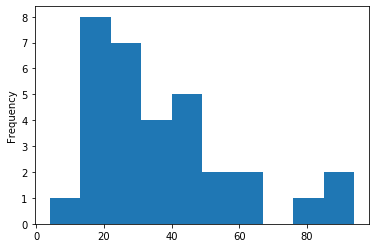

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

features, target = next(train_gen_flow)

pd.Series(target).plot.hist()

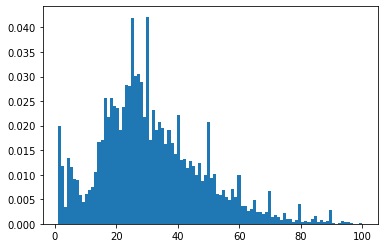

In [3]:
plt.hist(labels['real_age'], density=True, bins=100)
pass

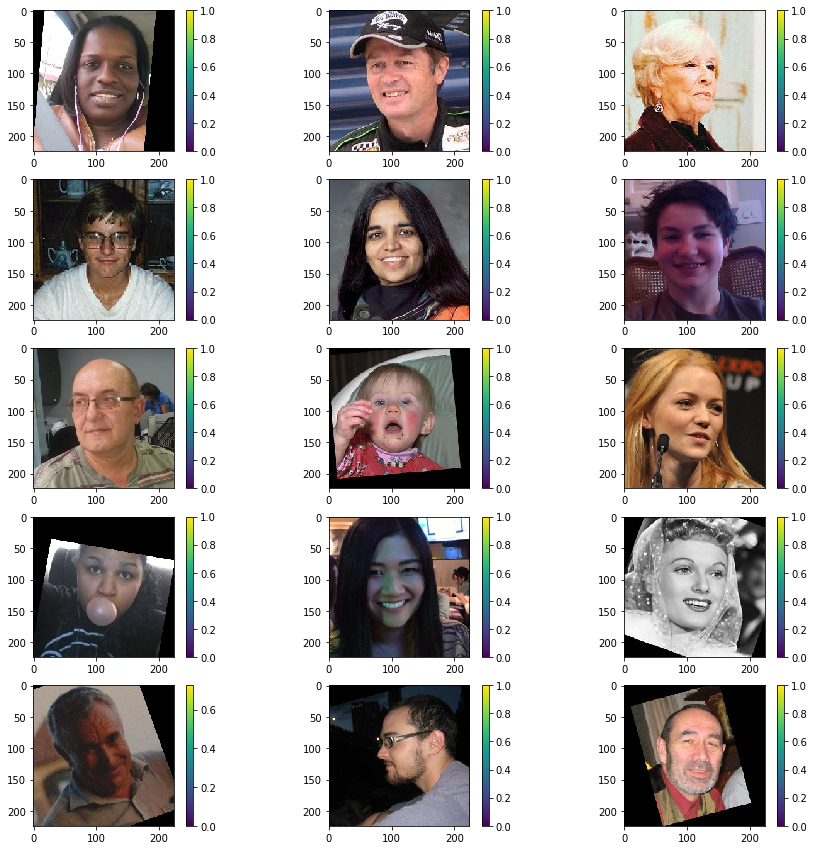

In [2]:
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 5
for i in range(1,16):
    fig.add_subplot(rows, columns, i)
    plt.imshow(features[i])
    plt.colorbar()
plt.show()

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow
 
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
 
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.

<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 356 steps, validate for 119 steps
Epoch 1/20
356/356 - 104s - loss: 209.6410 - mae: 11.0162 - val_loss: 298.8048 - val_mae: 12.9036
Epoch 2/20
356/356 - 40s - loss: 137.5657 - mae: 8.9268 - val_loss: 260.1960 - val_mae: 12.1206
Epoch 3/20
356/356 - 40s - loss: 112.1808 - mae: 8.1075 - val_loss: 173.7131 - val_mae: 9.8754
Epoch 4/20
356/356 - 40s - loss: 94.7208 - mae: 7.4535 - val_loss: 109.8498 - val_mae: 7.9621
Epoch 5/20
356/356 - 40s - loss: 79.5545 - mae: 6.8540 - val_loss: 416.7681 - val_mae: 15.8323
Epoch 6/20
356/356 - 40s - loss: 66.1571 - mae: 6.2349 - val_loss: 111.8255 - val_mae: 8.1775
Epoch 7/20
356/356 - 40s - loss: 58.2503 - mae: 5.8513 - val_loss: 153.9035 - val_mae: 9.0492
Epoch 8/20
356/356 - 40s - loss: 51.3453 - mae: 5.5305 - val_loss: 96.3890 - val_mae: 7.3396
Epoch 9/20
356/356 - 40s - loss: 43.2623 - mae: 5.0816 - val_loss: 151.0522 - val_mae: 9.3900
Epoch 10/20
356/356 - 40s - loss: 36.9773 - mae: 4.6990 - val_loss: 93.4297 - val_mae: 7.3654
Epoch 11/20
356/356 - 40s - loss: 32.3048 - mae: 4.3596 - val_loss: 84.4760 - val_mae: 6.8759
Epoch 12/20
356/356 - 40s - loss: 28.0180 - mae: 4.1017 - val_loss: 104.1980 - val_mae: 7.6434
Epoch 13/20
356/356 - 40s - loss: 28.4287 - mae: 4.1191 - val_loss: 90.8128 - val_mae: 7.2466
Epoch 14/20
356/356 - 40s - loss: 24.7980 - mae: 3.8442 - val_loss: 101.3604 - val_mae: 7.4566
Epoch 15/20
356/356 - 40s - loss: 22.7129 - mae: 3.6492 - val_loss: 88.3764 - val_mae: 7.0805
Epoch 16/20
356/356 - 40s - loss: 20.9325 - mae: 3.5165 - val_loss: 80.5138 - val_mae: 6.6670
Epoch 17/20
356/356 - 40s - loss: 18.6902 - mae: 3.3569 - val_loss: 86.4412 - val_mae: 6.9314
Epoch 18/20
356/356 - 40s - loss: 16.9541 - mae: 3.1798 - val_loss: 93.6682 - val_mae: 7.3642
Epoch 19/20
356/356 - 40s - loss: 16.5386 - mae: 3.1149 - val_loss: 133.6027 - val_mae: 8.5133
Epoch 20/20
356/356 - 40s - loss: 17.2833 - mae: 3.1932 - val_loss: 91.2769 - val_mae: 7.4456

119/119 - 10s - loss: 91.2769 - mae: 7.4456
Test MAE: 7.4456
```

## Анализ обученной модели

* Модель достигла метрики требуемого значения MAE менее 8
* Для оптимизации метрики можно указать 16 эпох и получить результат раньше